In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Minimization

### Golden-section search
Task 1: Program the search for the minimum using the golden section method (interval division).

Find the minimum of the function `cos(x)` in the interval `[2, 4]`. Observe the convergence rate - that is, the accuracy of determining the position of the minimum `xmin` and the functional value `cos(xmin)` at the minimum, depending on the number of iterations. With what accuracy can these parameters be determined?

Then find the minimum of the function `1 + (x-0.1)**4` on the interval `[-1, 1]` and evaluate the accuracy of determining the minimum in a similar way.

In [2]:
def golden_min(f, a, b, tol=1e-5):
    iphi = 2/(np.sqrt(5) + 1) # 0.618...
    approximations = [[a, b]]
    
    c = b - (b - a) * iphi
    d = a + (b - a) * iphi
    while np.abs(b - a) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
            
        approximations.append([a,b])
        
        c = b - (b - a) * iphi
        d = a + (b - a) * iphi
        
    return (b + a) / 2, np.array(approximations)
    

In [3]:
def f(x): return np.cos(x)
xmin, approx = golden_min(f, 3, 4, tol=1e-14)

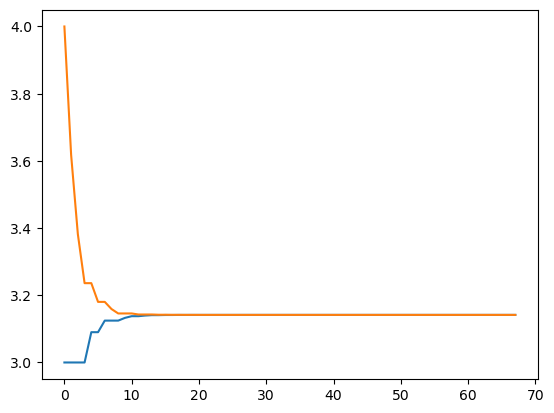

In [4]:
plt.plot(np.arange(approx.shape[0]), approx[:,0])
plt.plot(np.arange(approx.shape[0]), approx[:,1])

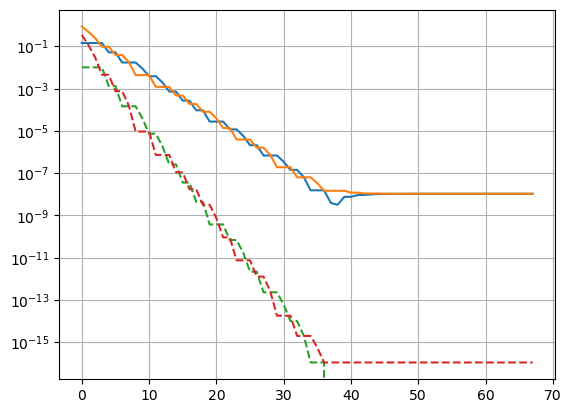

In [5]:
plt.plot(np.arange(approx.shape[0]), np.abs(approx[:,0]-np.pi))
plt.plot(np.arange(approx.shape[0]), np.abs(approx[:,1]-np.pi))
plt.plot(np.arange(approx.shape[0]), np.abs(f(approx[:,0])+1), "--")
plt.plot(np.arange(approx.shape[0]), np.abs(f(approx[:,1])+1), "--")
plt.grid()
plt.gca().set_yscale("log")

In [6]:
xmin - np.pi # ~sqrt(eps)

1.0536708838770892e-08

In [7]:
f = lambda x: 1+(x-0.1)**4
true_min = 0.1


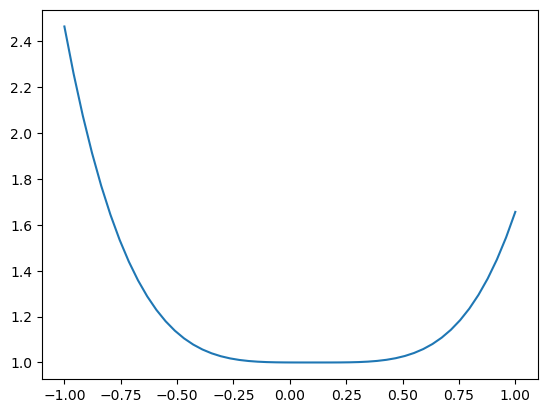

In [8]:
x = np.linspace(-1, 1)
plt.plot(x, f(x))

In [9]:
xmin, approx = golden_min(f, -1, 1, tol=1e-14)

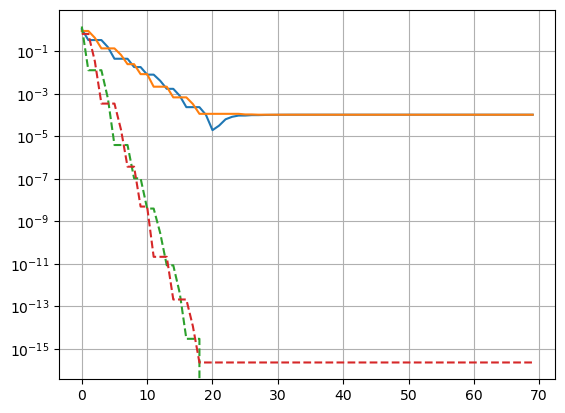

In [10]:
plt.plot(np.arange(approx.shape[0]), np.abs(approx[:,0]-true_min))
plt.plot(np.arange(approx.shape[0]), np.abs(approx[:,1]-true_min))
plt.plot(np.arange(approx.shape[0]), np.abs(f(approx[:,0])-f(true_min)), "--")
plt.plot(np.arange(approx.shape[0]), np.abs(f(approx[:,1])-f(true_min)), "--")
plt.grid()
plt.gca().set_yscale("log")

In [11]:
xmin

0.1001026484881866

The numerical limits of accuracy:

Text(0.5, 0, '(x-true_min)*1e4')

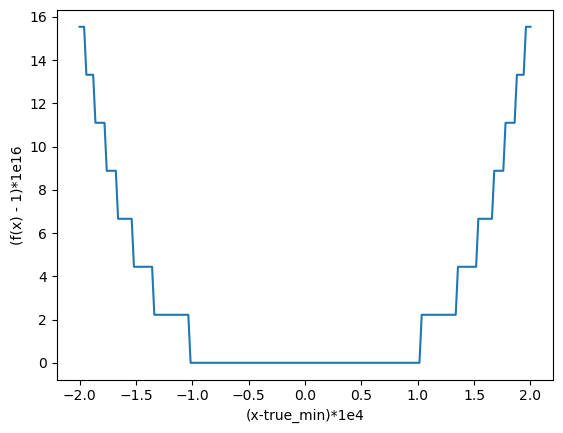

In [12]:
xrange = np.linspace(-.2e-3, +.2e-3, 200)
plt.plot(xrange*1e4, (f(xrange+true_min)-1)*1e16)

plt.ylabel("(f(x) - 1)*1e16")
plt.xlabel("(x-true_min)*1e4")


### Newton's method
Implement the Newton's method for optimization. I.e. - find the root of $f'(x)$.

Reminder: Newton's method for finding the root of $f(x)$ is
$$x_{n+1} = x_{n}-\frac{f(x_n)}{f'(x_n)}$$

In [13]:
def newton_min(f, df, ddf, a, maxiter=10):
    for i in range(maxiter):
        a_new = a - df(a)/ddf(a)
        #print(a_new)
        if a_new == a:
            if ddf(a) > 0:
                return a
            else:
                raise(RuntimeError("Method did not converge to minimum"))
        a = a_new
    print("maxiter reached")
    return a

In [14]:
def f(x): return 1+(x-0.1)**4
def df(x): return 4*(x-0.1)**3
def ddf(x): return 3*4*(x-0.1)**2
true_min = 0.1

In [15]:
newton_min(f, df, ddf, 1, maxiter=100)

0.10000000000000002

In [16]:
def f(x): return x**2 + x
def df(x): return 2*x + 1
def ddf(x): return 2

In [17]:
newton_min(f, df, ddf, 1)

-0.5

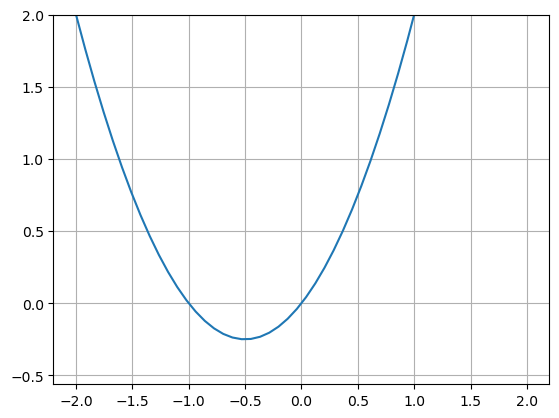

In [18]:
x = np.linspace(-2, 2)
plt.plot(x, f(x))
plt.ylim(ymax=2)
plt.grid()